# Thresholding

Thresholding is a type of image segmentation where pixels of an image are changed to make it easier to analyze the image. Generally an image is cnevrted from grayscale or RGB to binary scale (completely black and white). Thresholding is used to select an area that you are interested in whie ignoring the rest of the image.

In [1]:
import skimage.io as skio
import matplotlib.pyplot as plt
import skimage.filters
import skimage.color
import numpy as np
%matplotlib widget

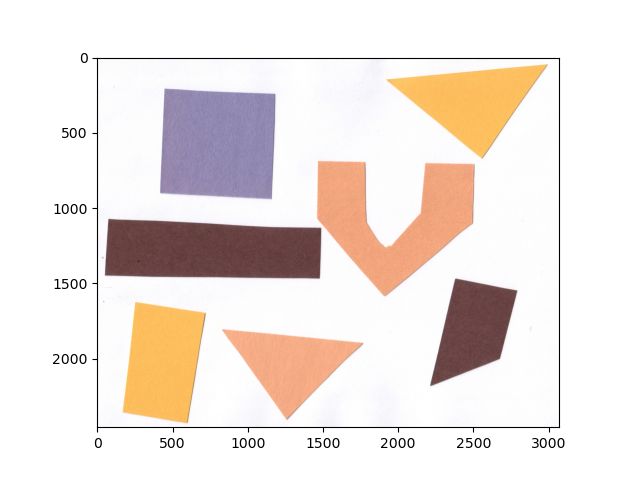

In [3]:
image = skio.imread("data/shapes-01.jpg")
plt.subplots()
plt.imshow(image)

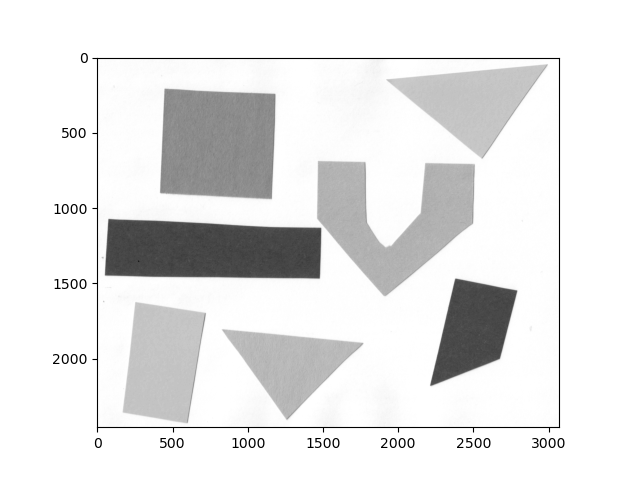

In [4]:
# convert image to grayscale
gray_image = skimage.color.rgb2gray(image)
# blur the image
blurred_image = skimage.filters.gaussian(gray_image, sigma = 1.0)
# plot blurred image
plt.subplots()
plt.imshow(blurred_image, cmap="gray")

(0.0, 1.0)

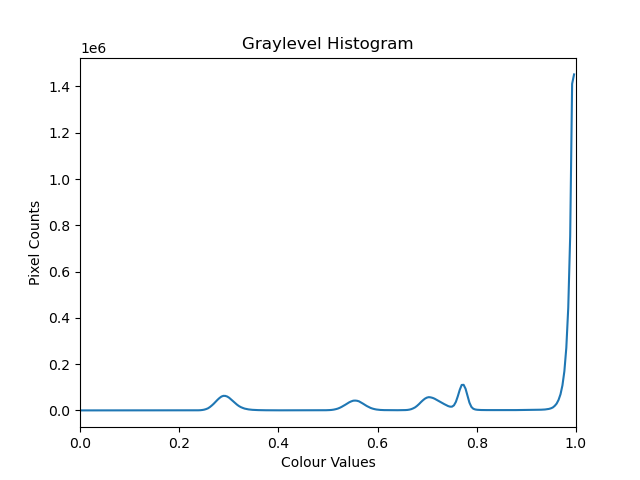

In [6]:
#Plotting histogram to figure out a good value of th
histogram, bin_edges = np.histogram(blurred_image, bins= 256, range = (0.0,1.0))
plt.figure()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel Histogram")
plt.xlabel("Colour Values")
plt.ylabel("Pixel Counts")
plt.xlim([0.0,1.0])

In [7]:
th = 0.8

binary_mask = blurred_image < th

In [11]:
blurred_image.shape

(2457, 3068)

In [8]:
binary_mask.shape

(2457, 3068)

In [9]:
binary_mask.dtype

dtype('bool')

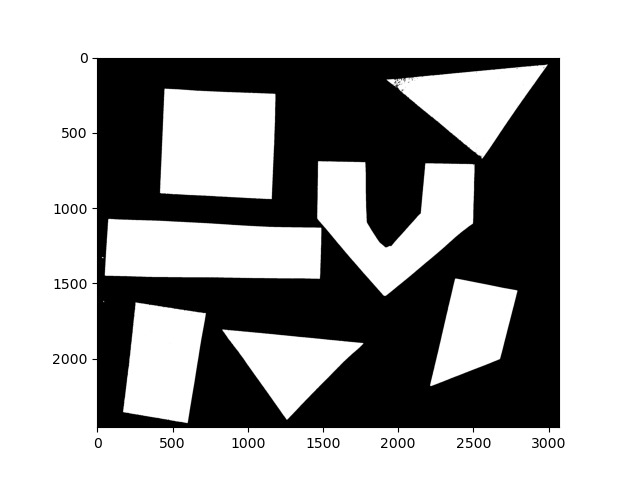

In [12]:
plt.subplots()
plt.imshow(binary_mask, cmap="gray")

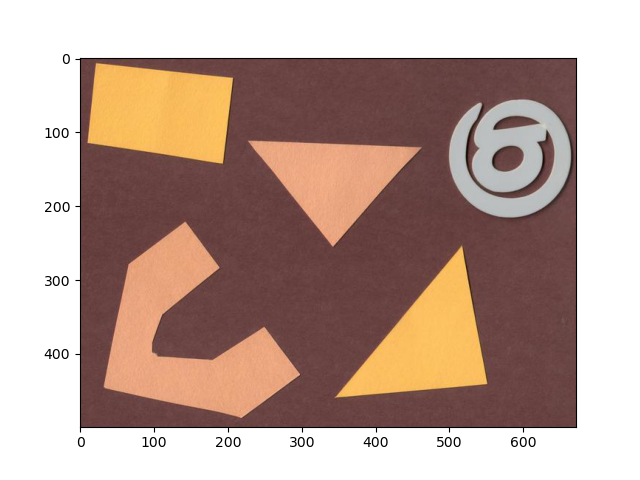

In [13]:
image = skio.imread("data/shapes-02.jpg")
plt.subplots()
plt.imshow(image)

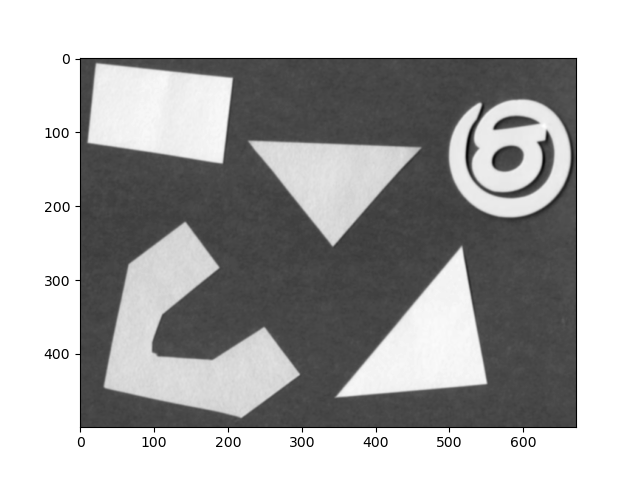

In [15]:
gray_image = skimage.color.rgb2gray(image)
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)
plt.subplots()
plt.imshow(blurred_image, cmap="gray")

(0.0, 1.0)

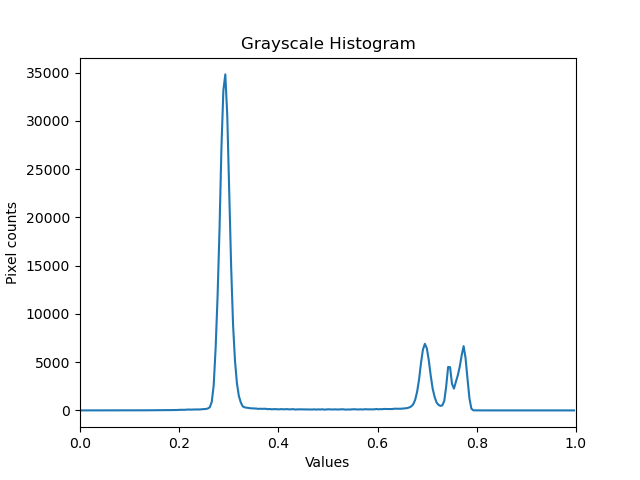

In [17]:
histogram, bin_edges = np.histogram(blurred_image, bins=256, range = (0.0,1.0))
plt.figure()
plt.plot(bin_edges[0:-1],histogram)
plt.title("Grayscale Histogram")
plt.xlabel("Values")
plt.ylabel("Pixel counts")
plt.xlim([0.0,1.0])

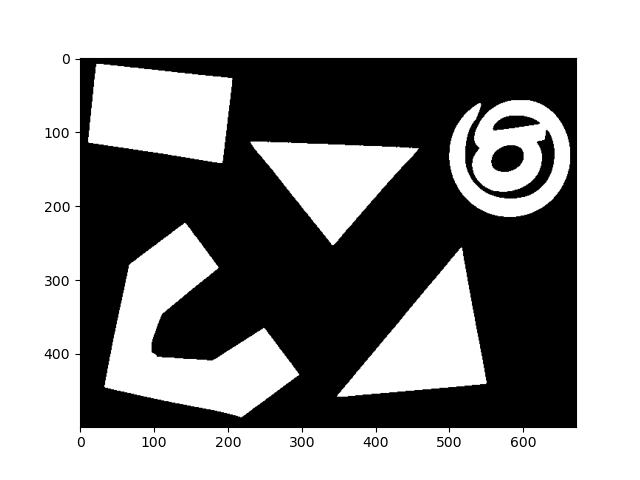

In [25]:
th = 0.6
binary_mask = blurred_image > th
plt.subplots()
plt.imshow(binary_mask, cmap="gray")

**Automatic Thresholding** - determined threshold value automatically using Otsu's method.

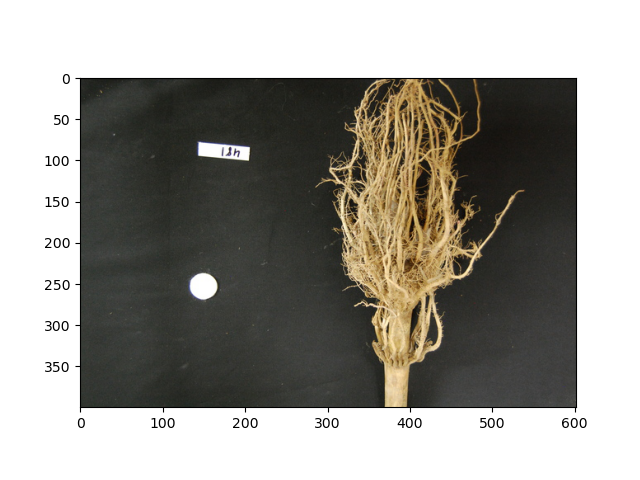

In [27]:
image =skio.imread("data/maize-root-cluster.jpg")
plt.subplots()
plt.imshow(image)

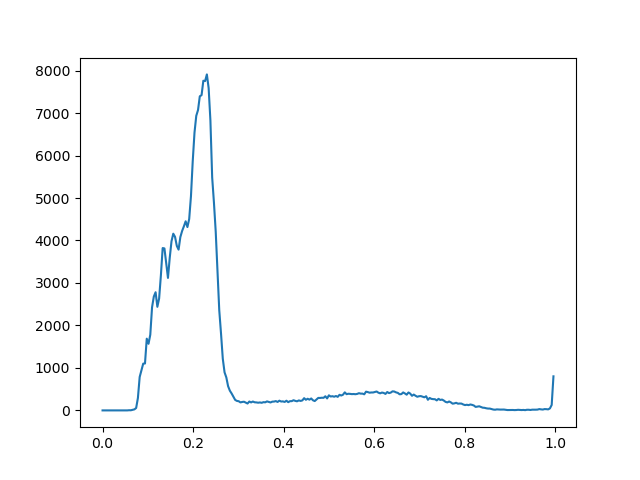

In [29]:
gray_image = skimage.color.rgb2gray(image)
blurred_image= skimage.filters.gaussian(gray_image, sigma = 1.0)
histogram, bin_edges = np.histogram(blurred_image, bins = 256, range=(0.0,1.0))
plt.subplots()
plt.plot(bin_edges[0:-1], histogram)

In [31]:
# from the above histigram it is not obvious what the th value should be
# many real world problems have plots like these
# In such scenarios, it is easier to use automatic thresholding
# If there are multiple peaks then otsu's multiple method can be used
th = skimage.filters.threshold_otsu(blurred_image)
print(th)

0.4113342270063075


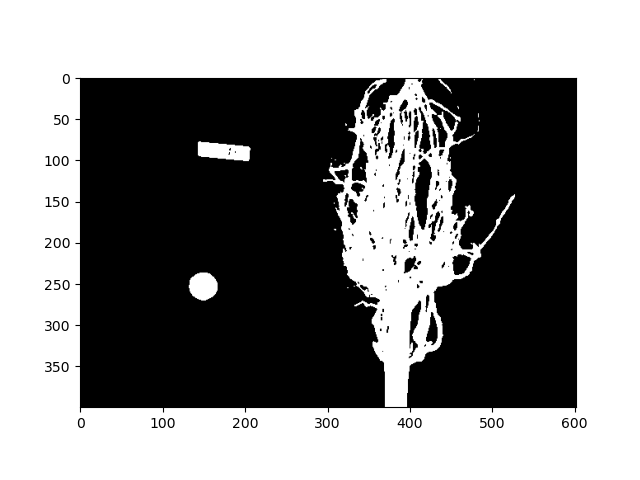

In [32]:
binary_mask = blurred_image > th
plt.subplots()
plt.imshow(binary_mask, cmap="gray")

In [33]:
#area
np.sum(binary_mask)

34811

In [34]:
# proportion of pixels that are True in the image
np.sum(binary_mask) / (binary_mask.shape[0] * binary_mask.shape[1])

0.1445639534883721

### Thresholding in a bacteria colony image

Task:
1. Plot and inspect the grayscale histogram of the image to determine a good threshold value for the image.
2. Create a binary mask that leaves the pixels in the bacteria colonies “on” while turning the rest of the pixels in the image “off”.

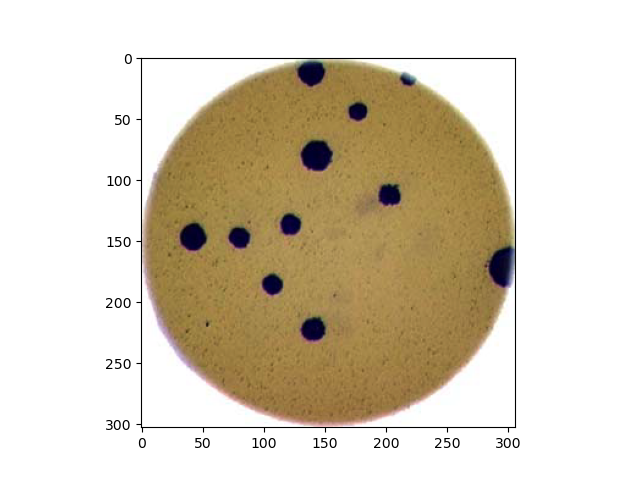

In [39]:
image = skio.imread("data/colonies-01.tif")
plt.subplots()
plt.imshow(image)

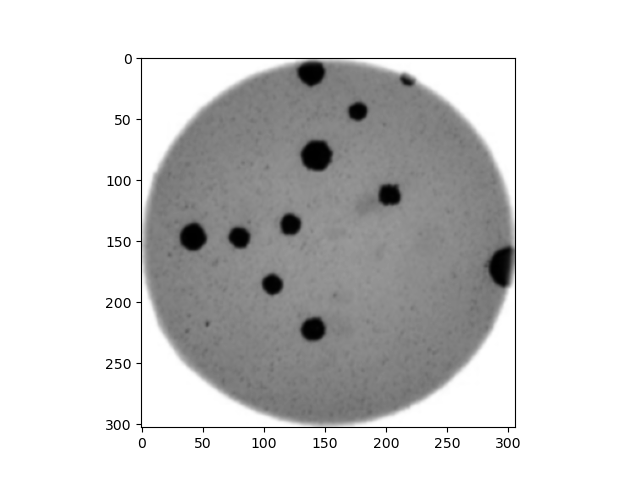

In [40]:
gray_image = skimage.color.rgb2gray(image)
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)
plt.subplots()
plt.imshow(blurred_image, cmap="gray")

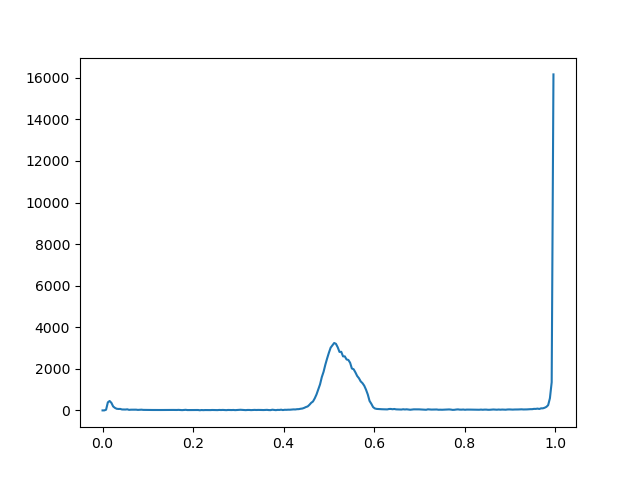

In [41]:
histogram, bin_edges = np.histogram(blurred_image, bins = 256, range=(0.0,1.0))
plt.subplots()
plt.plot(bin_edges[0:-1], histogram)

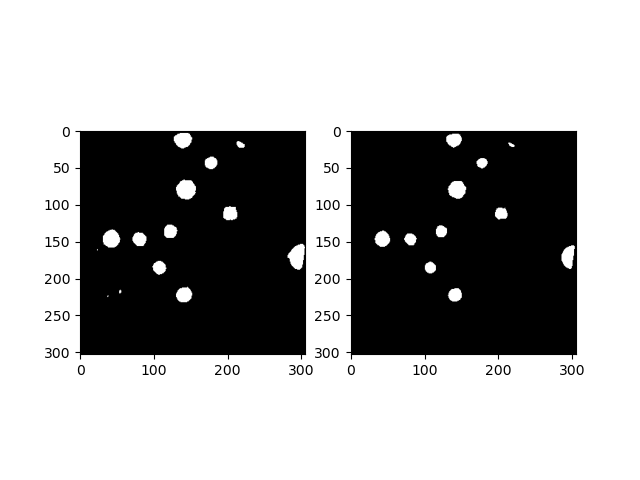

In [46]:
th1 = 0.4
th2 = 0.2
binary_mask1 = blurred_image < th1
binary_mask2 = blurred_image < th2
fig, ax = plt.subplots(1,2)
ax[0].imshow(binary_mask1, cmap="gray")
ax[1].imshow(binary_mask2, cmap="gray")